# Lab 8a: AI Algorithms

Lab associated with Module 8a: AI Algorithms

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

***

### Section 1: Computing Eigen-vectors and values using Power-iteration Algorithm

Let us see if we can implement power-iteration algorithm from the lectures, before we do that, let us see what already implemented functions gives us:

In [4]:
a = np.array([[1,2],[4,5],[5,8],[3,9],[4,2],[1,18],[7,8]])

Let us see how basic linear algebra operations are performed, let us see transpose, dot-product, covariance, coefficient calucation, etc

In [5]:
a

array([[ 1,  2],
       [ 4,  5],
       [ 5,  8],
       [ 3,  9],
       [ 4,  2],
       [ 1, 18],
       [ 7,  8]])

In [6]:
a.T

array([[ 1,  4,  5,  3,  4,  1,  7],
       [ 2,  5,  8,  9,  2, 18,  8]])

In [7]:
M = np.dot(a.T, a)
M

array([[117, 171],
       [171, 566]])

In [8]:
np.linalg.eig(M)

(array([ 59.2921865, 623.7078135]),
 array([[-0.94750015, -0.31975533],
        [ 0.31975533, -0.94750015]]))

In [9]:
np.corrcoef(a.T)

array([[ 1.        , -0.20849519],
       [-0.20849519,  1.        ]])

In [10]:
np.cov(a.T)

array([[ 4.61904762, -2.45238095],
       [-2.45238095, 29.95238095]])

###### ----- Next -----







In [11]:
a = np.array([[1,2],[2,1],[3,4],[4,3]])

In [12]:
N, n = a.shape

First take on power Iteration algorithm for computing Eigen-vectors and values

In [13]:
def power_iteration(A, num_simulations):
    
    x_k = np.random.rand(A.shape[1])
    
    for _ in range(num_simulations):
        
        x_k1 = np.dot(A, x_k)
        
        # calculate the norm
        x_k1_norm = np.linalg.norm(x_k1) # re normalize the vector
        x_k = x_k1 / x_k1_norm 
    
    return x_k

In [14]:
M = np.dot(a.T, a)

In [15]:
M

array([[30, 28],
       [28, 30]])

In [16]:
e1 = power_iteration(M, 10)

In [17]:
e1

array([0.70710678, 0.70710678])

In [18]:
l1 = np.dot(e1.T, M).dot(e1)
e1 = e1.reshape(2,1)

In [19]:
M2 = M - l1 * np.matmul(e1, e1.T)

In [20]:
e2 = power_iteration(M2, 10)

In [21]:
l2 = np.dot(e2.T, M2).dot(e2)
e2 = e2.reshape(2,1)

In [22]:
test_e1 = np.linalg.eig(M)
test_e1

(array([58.,  2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [23]:
print(f'e1:\n{e1}\n')
print(f'l1:\n{l1}\n')
print(f'e2:\n{e2}\n')
print(f'l2:\n{l2}\n')

print('\ntest_e1:')
test_e1

e1:
[[0.70710678]
 [0.70710678]]

l1:
58.0

e2:
[[-0.70710678]
 [ 0.70710678]]

l2:
2.0000000000000018


test_e1:


(array([58.,  2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

***

### <font color='red'> Section 2: Wrap-up above code to make a generic function for computing Eigen-vectors and values. </font>

In [73]:
#### TODO ####
### Good Luck ###

def eigen_calc(a, dim=4, pwr_it=10):
    # Get pca M
    A = np.array(a)
    M = np.dot(A.T, A)
    
    N, n = A.shape
    
    # Init return arrays
    eigen_vals = np.zeros(dim)
    eigen_matrix = np.zeros((dim,n))
    
    #print(eigen_vals)
    #print(eigen_matrix)
    #print(np.dot(eigen_vals, eigen_matrix))
    
    # For every column and thus value in eigen vector, compute e1 and corisponding l1
    for e_dim in range(dim):
        e1 = power_iteration(M, pwr_it)
        l1 = np.dot(e1.T, M).dot(e1)
        
        eigen_matrix[e_dim] = e1
        e1 = e1.reshape(n,1)
        
        eigen_vals[e_dim] = l1
        
        M = M - l1 * np.matmul(e1, e1.T)

    
    return eigen_vals, eigen_matrix.T
# --





In [74]:
print(" -- TEST -- ")

a = np.array([[1,2],[2,1],[3,4],[4,3]])

eigen_vals, eigen_matrix = eigen_calc(a,2)


print(f"\n Eigen Values:\n{eigen_vals}\n")
print(f"\n Eigen Vectors:\n{eigen_matrix}\n")

print(" -- Numpy version for reference -- ")
M = np.dot(a.T, a)
test_e1 = np.linalg.eig(M)

print(f"\n Eigen Values:\n{test_e1[0]}\n")
print(f"\n Eigen Vectors:\n{test_e1[1]}\n")


 -- TEST -- 

 Eigen Values:
[58.  2.]


 Eigen Vectors:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 -- Numpy version for reference -- 

 Eigen Values:
[58.  2.]


 Eigen Vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]



***

### <font color='red'> Section 3: Do the PCA Analysis using your eigen-vector function on iris.txt data. </font>

 -- Iris Dataset -- 

     sepal length  sepal width  petal length  petal width           names
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


 -- Eigen -- 

M:
 [[5223.85 2670.98 3484.25 1127.65]
 [2670.98 

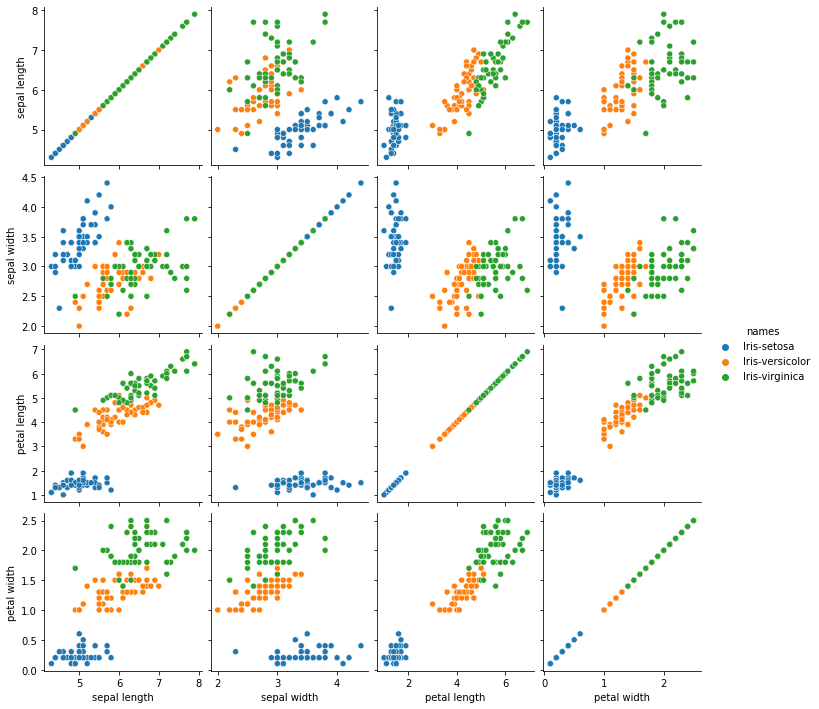

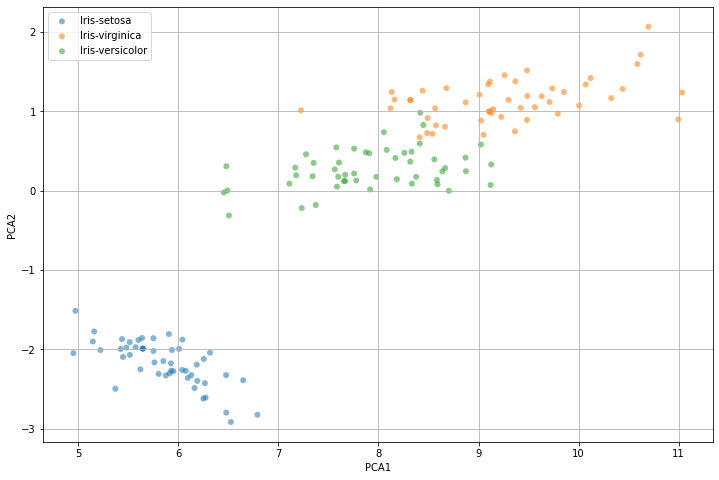

In [75]:
#### TODO ####
### Good Luck ###

# Load the iris.data

iris_vals_names = ["sepal length", "sepal width", "petal length", "petal width", "names"]

iris_df_full = pd.read_csv("iris.data", names = iris_vals_names)

# Print df
print(" -- Iris Dataset -- \n")
print(iris_df_full)
print("\n")

# matrix of 150 x 4 vals
iris_df = iris_df_full[iris_vals_names[:-1]]
a = iris_df.to_numpy()

# Get names
iris_names = list(iris_df_full["names"])
iris_names_cats = list(set(iris_names))

#a = np.array([[1,2],[2,1],[3,4],[4,3]])


print(" -- Eigen -- \n")

m = np.dot(a.T, a)

print("M:\n",m,"\n")

# Numpy version for verification
test_e1_vals, test_e1_matrix = np.linalg.eig(m)

# My version
eigen_vals, eigen_matrix = eigen_calc(a,4)

pca_data = np.dot(a, eigen_matrix)


print("eigen vals:\n",eigen_vals, "\n\neigen matrix:\n", eigen_matrix,'\n')

print("PCA plotted\n")

print(f"pca_data shape:{pca_data.shape}\n")

print("First 10")
print(pca_data[:10])
print("\n")


# Generate label indices

# (used mainly for plotting)

label_indices = {}
for iris_name in iris_names_cats:
    label_indices[iris_name] = list(iris_df_full["names"][iris_df_full["names"] == iris_name].index)
# --


values_by_label = {}
for iris_name in label_indices:
    values_by_label[iris_name] = pca_data[label_indices[iris_name]]
# --

#print(label_indices)
#print(values_by_label)


# PLOT OG

print("seaborn pairplot is hands down my favorite plotting function, hue makes things so ez")
sns.pairplot(iris_df_full, hue="names", diag_kind = None)


# PLOT at 2 dimentionality


fig, ax = plt.subplots()
for iris_name in values_by_label:
    label_values = values_by_label[iris_name]
    x = label_values[:,0]
    y = label_values[:,1]
    plt.scatter(x,y, label = iris_name, alpha=0.55, edgecolors='none')

ax.legend()
ax.grid(True)

plt.xlabel('PCA1')
plt.ylabel('PCA2')

zoom = 2
w, h = fig.get_size_inches()
fig.set_size_inches(w * zoom, h * zoom)


plt.show()





In [72]:
# How much of the variance is explained by each principle component

#eigen_vals, eigen_matrix

print("Power iteration eigen")

variance_percentages = []
for eigen_val in eigen_vals:
    variance_percentage = (eigen_val / sum(eigen_vals)) * 100
    variance_percentages.append(variance_percentage)
# --

print(variance_percentages)

print("np.linalg.eig eigen")

#eigen_vals, eigen_matrix = np.linalg.eig(M)
#test_e1_vals, test_e1_matrix


variance_percentages_linalg = []
for eigen_val in test_e1_vals:
    variance_percentage = (eigen_val / sum(test_e1_vals)) * 100
    variance_percentages_linalg.append(variance_percentage)
# --

print(variance_percentages_linalg)

Power iteration eigen
[96.54296885622246, 3.293797035724657, 0.12621399871761668, 0.03702010933528187]
np.linalg.eig eigen
[96.54296885622257, 3.293797035724659, 0.12621399871768135, 0.037020109335079265]


***

### Section 4: SVD and UV Decomposition

Let us read-in movie recommendation data, we will use this for SVD and UV decomposition algorithms

In [153]:


from sklearn.model_selection import train_test_split

from scipy.sparse.linalg import svds

from sklearn.metrics import mean_squared_error

In [154]:
path = ''

In [155]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(path + 'ml-100k/u.data', sep='\t', names=header)

In [156]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [157]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]

print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [158]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [159]:
# -1 in the code is because user index starts from 1, but np matrix indices starts at 0
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [160]:
sparsity = round(1.0-len(df)/float(n_users*n_items),3)

In [161]:
print('The sparsity level of MovieLens100K is ' + str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


In [162]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    
    return np.sqrt(mean_squared_error(prediction, ground_truth))

Let us do SVD first (We will use SVD from scipy.sparse.linalg package, you are free to use your power-iteration based implementation)

In [163]:

k_val = 10

u, s, vt = svds(train_data_matrix, k = k_val)
s_diag_matrix = np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

print(" -- SVD (scipy.sparse.linalg) -- ")

print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))


# My Implementation of the above, using power iteration


eigen_vals, eigen_matrix = eigen_calc(train_data_matrix,k_val)

s_power_it = np.diag(np.sqrt(eigen_vals))
u_power_it = train_data_matrix.dot(eigen_matrix.dot(np.linalg.inv(s_power_it)))
vt_power_it = eigen_matrix.T.conj()

X_pred = np.dot(np.dot(u_power_it, s_power_it), vt_power_it)

print(" -- SVD (me implementation) -- ")

print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))




 -- SVD (scipy.sparse.linalg) -- 
User-based CF RMSE: 2.2197246997774327
 -- SVD (me implementation) -- 
User-based CF RMSE: 2.2300687484812705


Let us write the code for UV Decomposition

In [164]:
def UVDecomposition(R, P, Q, K, steps=10, alpha=0.0002, beta=0.02): 
    
    # P AND Q == U AND V
    # alpha is the SGD step size
    # beta is regularization parameter (aka lambda)
    
    # The reason Q is transposed is for the purpose of matrix operations in this orrientation
    # it is actually flipped back after
    Q = Q.T
    for step in range(steps):
        print("Step: " + str(step))
        
        # Compute the Gradient first and update it
        for i in range(len(R)):
            for j in range(len(R[i])):
                # Only consider NON-BLANK POINTS
                if R[i][j] > 0:
                    # eij == M - UV where UV is M^ (the estiamte for M, starts out as M)
                    # This is only for P(ROW i) and Q(COLUMN j)
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        
                        # I am commenting follwing two lines, please ignore them, they are basically implementing reularization in our framework
                        # Also ignore the value beta in this function (If you are curious talk to your tutor)
                        #P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        #Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                        
                        # The derivative of (M - UV)^2 WITH RESPECT TO P would be 2(M - UV) * U
                        # then because we are equating for P[i][k] we have P[i][k] + 2(M - UV) * U.
                        # Then alpha is a value that is there for contolled gradient descent,
                        # alpha is usually something very small ie: 0.0002, this is the learning rate which artifically limits the rate of change,
                        # here it multiplys the added value.
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j])
                        # The other way around for Q
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k])
                        
                        # So for P along the length of the matrix (k) for all eigen values its going to adjust using the partial derivative to U
                        # then for U the same but to P
                    
        
        # So the idea is that after the first step we will caclulate the Sum MSE of the whole thing to wait for stopping
        # Let us compute the error
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                # Only consider NON-BLANK POINTS
                if R[i][j] > 0:
                    # Sum of squares of the errors
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2) 
                    
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                        
        # If error gets down below a threshold, break out of iterations
        if e < 0.001: 
            break
    
    return P, Q.T

In [165]:
k = 10
P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)

In [166]:
nP, nQ = UVDecomposition(train_data_matrix, P, Q, k)

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9


In [167]:
X_pred = np.dot(nP, nQ.T)
print('UV-Decomposition CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

UV-Decomposition CF RMSE: 1.1190645011702929


In [168]:
# UV-Decomp thrashes SVD but is slower

#Testing

***

### Section 5: Computational Graphs

Let us start by defining the node first:

In [44]:
from functools import wraps

def primitive(f): 
    
    # The input np function is stored and wrapped into the value, this "inner" function will then run it with *args, **kwargs
    @wraps(f)
    def inner(*args, **kwargs):

        
        # The following function just check if we have a constant or a node in our graph, and returns accordingly
        def getval(o): 
            
            if type(o) == Node:
                return o.value
            else:
                return o
        
        # Handle conversion and input of *args, **kwargs
        # Convert any nodes into arguments corrisponding to the nodes value
        
        # ie: np.add(node(value=3), 4) = 7
        # because the value of node is 3
        
        if len(args):       
            argvals = [getval(o) for o in args]
        else:               
            argvals = args
            
        if len(kwargs):     
            kwargvals = dict([(k,getval(o)) for k,o in kwargs.items()])
        else:               
            kwargvals =  kwargs
        
        # get parents from *args, **kwargs
        l = list(args) + list(kwargs.values())
        # If any of the inputs where nodes, that means that they would be parents as thier values are propagated through
        parents = [o for o in l if type(o) == Node ]
        
        """ Before value compute """
        
        # the value is equal to the running of the input function with any input values from int or values
        value = f(*argvals, **kwargvals)
        
        """ After value compute """
        
        print("add", "'" + f.__name__ + "'", "to graph with value", value)
        
        return Node(value, f, parents)
    
    return inner

In [45]:
add_new = primitive(np.add)
mul_new = primitive(np.multiply)
div_new = primitive(np.divide)
sub_new = primitive(np.subtract)
neg_new = primitive(np.negative)
exp_new = primitive(np.exp)

# I learnt about the @wrap thing, VERY NICE! :)
print(mul_new.__doc__[0:800])

multiply(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Multiply arguments element-wise.

Parameters
----------
x1, x2 : array_like
    Input arrays to be multiplied.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the



In [46]:
class Node:
    
    """A node in a computation graph."""
    def __init__(self, value, fun, parents):
        
        self.parents = parents
        self.value = value
        self.fun = fun 
        
    def __repr__(self): 
        
        """A (very) basic string representation"""
        if self.value is None: 
            str_val = 'None'
        else:                  
            str_val = str(round(self.value,3))
        
        return "\n" + "Fun: " + str(self.fun) + " Value: "+ str_val + " Parents: " + str(self.parents)

    # Now operations like "+" can be used
    def __add__(self, other): return add_new(self, other)
    def __radd__(self, other): return add_new(other, self)
    def __sub__(self, other): return sub_new(self, other)
    def __rsub__(self, other): return sub_new(other, self)
    def __truediv__(self, other): return div_new(self, other)
    def __rtruediv__(self, other): return div_new(other, self)
    def __mul__(self, other): return mul_new(self, other)
    def __rmul__(self, other): return mul_new(other, self)
    def __neg__(self): return neg_new(self)
    def __exp__(self): return exp_new(self)

The following function adds operation/primitive to computation graph

Let us add numpy add, multiply, divide, subtract, negative and exp functions

Let us build the first node

In [47]:
def start_node(value = None): 
    
    """A function to create an empty node to start off the graph"""
    fun, parents = lambda x: x, []
    return Node(value, fun, parents)

Let us test on some function

In [48]:
z = start_node(1.5)

t1 = mul_new(z, -1)
t2 = exp_new(t1)
t3 = add_new(t2, 1)
y = div_new(1,t3)
print("Final answer:", round(y.value,3))  # correct final output 
print(y)

add 'multiply' to graph with value -1.5
add 'exp' to graph with value 0.22313016014842982
add 'add' to graph with value 1.22313016014843
add 'true_divide' to graph with value 0.8175744761936437
Final answer: 0.818

Fun: <ufunc 'true_divide'> Value: 0.818 Parents: [
Fun: <ufunc 'add'> Value: 1.223 Parents: [
Fun: <ufunc 'exp'> Value: 0.223 Parents: [
Fun: <ufunc 'multiply'> Value: -1.5 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B1788AE9D0> Value: 1.5 Parents: []]]]]


In [49]:
z = start_node(1)
t1 = mul_new(z, -1)
y = div_new(-1,t1)
print("Final answer:", round(y.value,3))  # correct final output 
print(y)

add 'multiply' to graph with value -1
add 'true_divide' to graph with value 1.0
Final answer: 1.0

Fun: <ufunc 'true_divide'> Value: 1.0 Parents: [
Fun: <ufunc 'multiply'> Value: -1 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B1788AED30> Value: 1 Parents: []]]


In [50]:

# f(x,y)=(x2∗y)+y+2
x = 3
y = 4

z_x = start_node(x)
t1_1 = mul_new(z_x, x)

z_y = start_node(y)

t2_1 = mul_new(t1_1, y)
t2_2 = add_new(z_y, 2)

t3_1 = add_new(t2_1, t2_2)

out_node = t3_1
print("Final answer:", round(out_node.value,3))  # correct final output 
print(out_node)

add 'multiply' to graph with value 9
add 'multiply' to graph with value 36
add 'add' to graph with value 6
add 'add' to graph with value 42
Final answer: 42

Fun: <ufunc 'add'> Value: 42 Parents: [
Fun: <ufunc 'multiply'> Value: 36 Parents: [
Fun: <ufunc 'multiply'> Value: 9 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B17888B0D0> Value: 3 Parents: []]], 
Fun: <ufunc 'add'> Value: 6 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B17888B160> Value: 4 Parents: []]]


In [51]:

log_new = primitive(np.log)

#(e.g., x2 + log(y) + 3z3)
x = 2
y = 3
z = 4

in_x = start_node(x)

in_y = start_node(y)

in_z = start_node(z)

t1_x2 = mul_new(in_x, x)

t1_log_y = log_new(in_y)

t1_z2 = mul_new(in_z, z)
t1_z3 = mul_new(t1_z2, z)

t1_3z3 = mul_new(t1_z3, 3)


t2_1 = add_new(t1_x2, t1_log_y)

#t2_1 = t1_x2 + t1_log_y

t3_1 = add_new(t2_1, t1_3z3)


out_node = t3_1
print("Final answer:", round(out_node.value,3))  # correct final output 
print(out_node)




add 'multiply' to graph with value 4
add 'log' to graph with value 1.0986122886681098
add 'multiply' to graph with value 16
add 'multiply' to graph with value 64
add 'multiply' to graph with value 192
add 'add' to graph with value 5.09861228866811
add 'add' to graph with value 197.0986122886681
Final answer: 197.099

Fun: <ufunc 'add'> Value: 197.099 Parents: [
Fun: <ufunc 'add'> Value: 5.099 Parents: [
Fun: <ufunc 'multiply'> Value: 4 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B17888BB80> Value: 2 Parents: []], 
Fun: <ufunc 'log'> Value: 1.099 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B17888BAF0> Value: 3 Parents: []]], 
Fun: <ufunc 'multiply'> Value: 192 Parents: [
Fun: <ufunc 'multiply'> Value: 64 Parents: [
Fun: <ufunc 'multiply'> Value: 16 Parents: [
Fun: <function start_node.<locals>.<lambda> at 0x000001B17888BA60> Value: 4 Parents: []]]]]
